In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from os.path import basename

In [2]:
tables_list = []
for files in glob.glob('pydata-book/datasets/babynames/yob*.txt'):
    year = basename(files).split('.')[0].split('b')[1]
    col_names = ['name', 'sex', 'number']
    table = pd.read_csv(files, names=col_names, dtype={'number': 'int32'})
    table['year'] = year
    table['year'] = table['year'].astype(int)
    tables_list.append(table)
all_years_table = pd.concat(tables_list, ignore_index=True)
all_years_table[:10]

,name,sex,number,year
0,Jennifer,F,59468,1976
1,Amy,F,31341,1976
2,Melissa,F,25092,1976
3,Heather,F,24198,1976
4,Angela,F,22046,1976
5,Michelle,F,19546,1976
6,Kimberly,F,18963,1976
7,Jessica,F,18374,1976
8,Lisa,F,17344,1976
9,Amanda,F,15590,1976


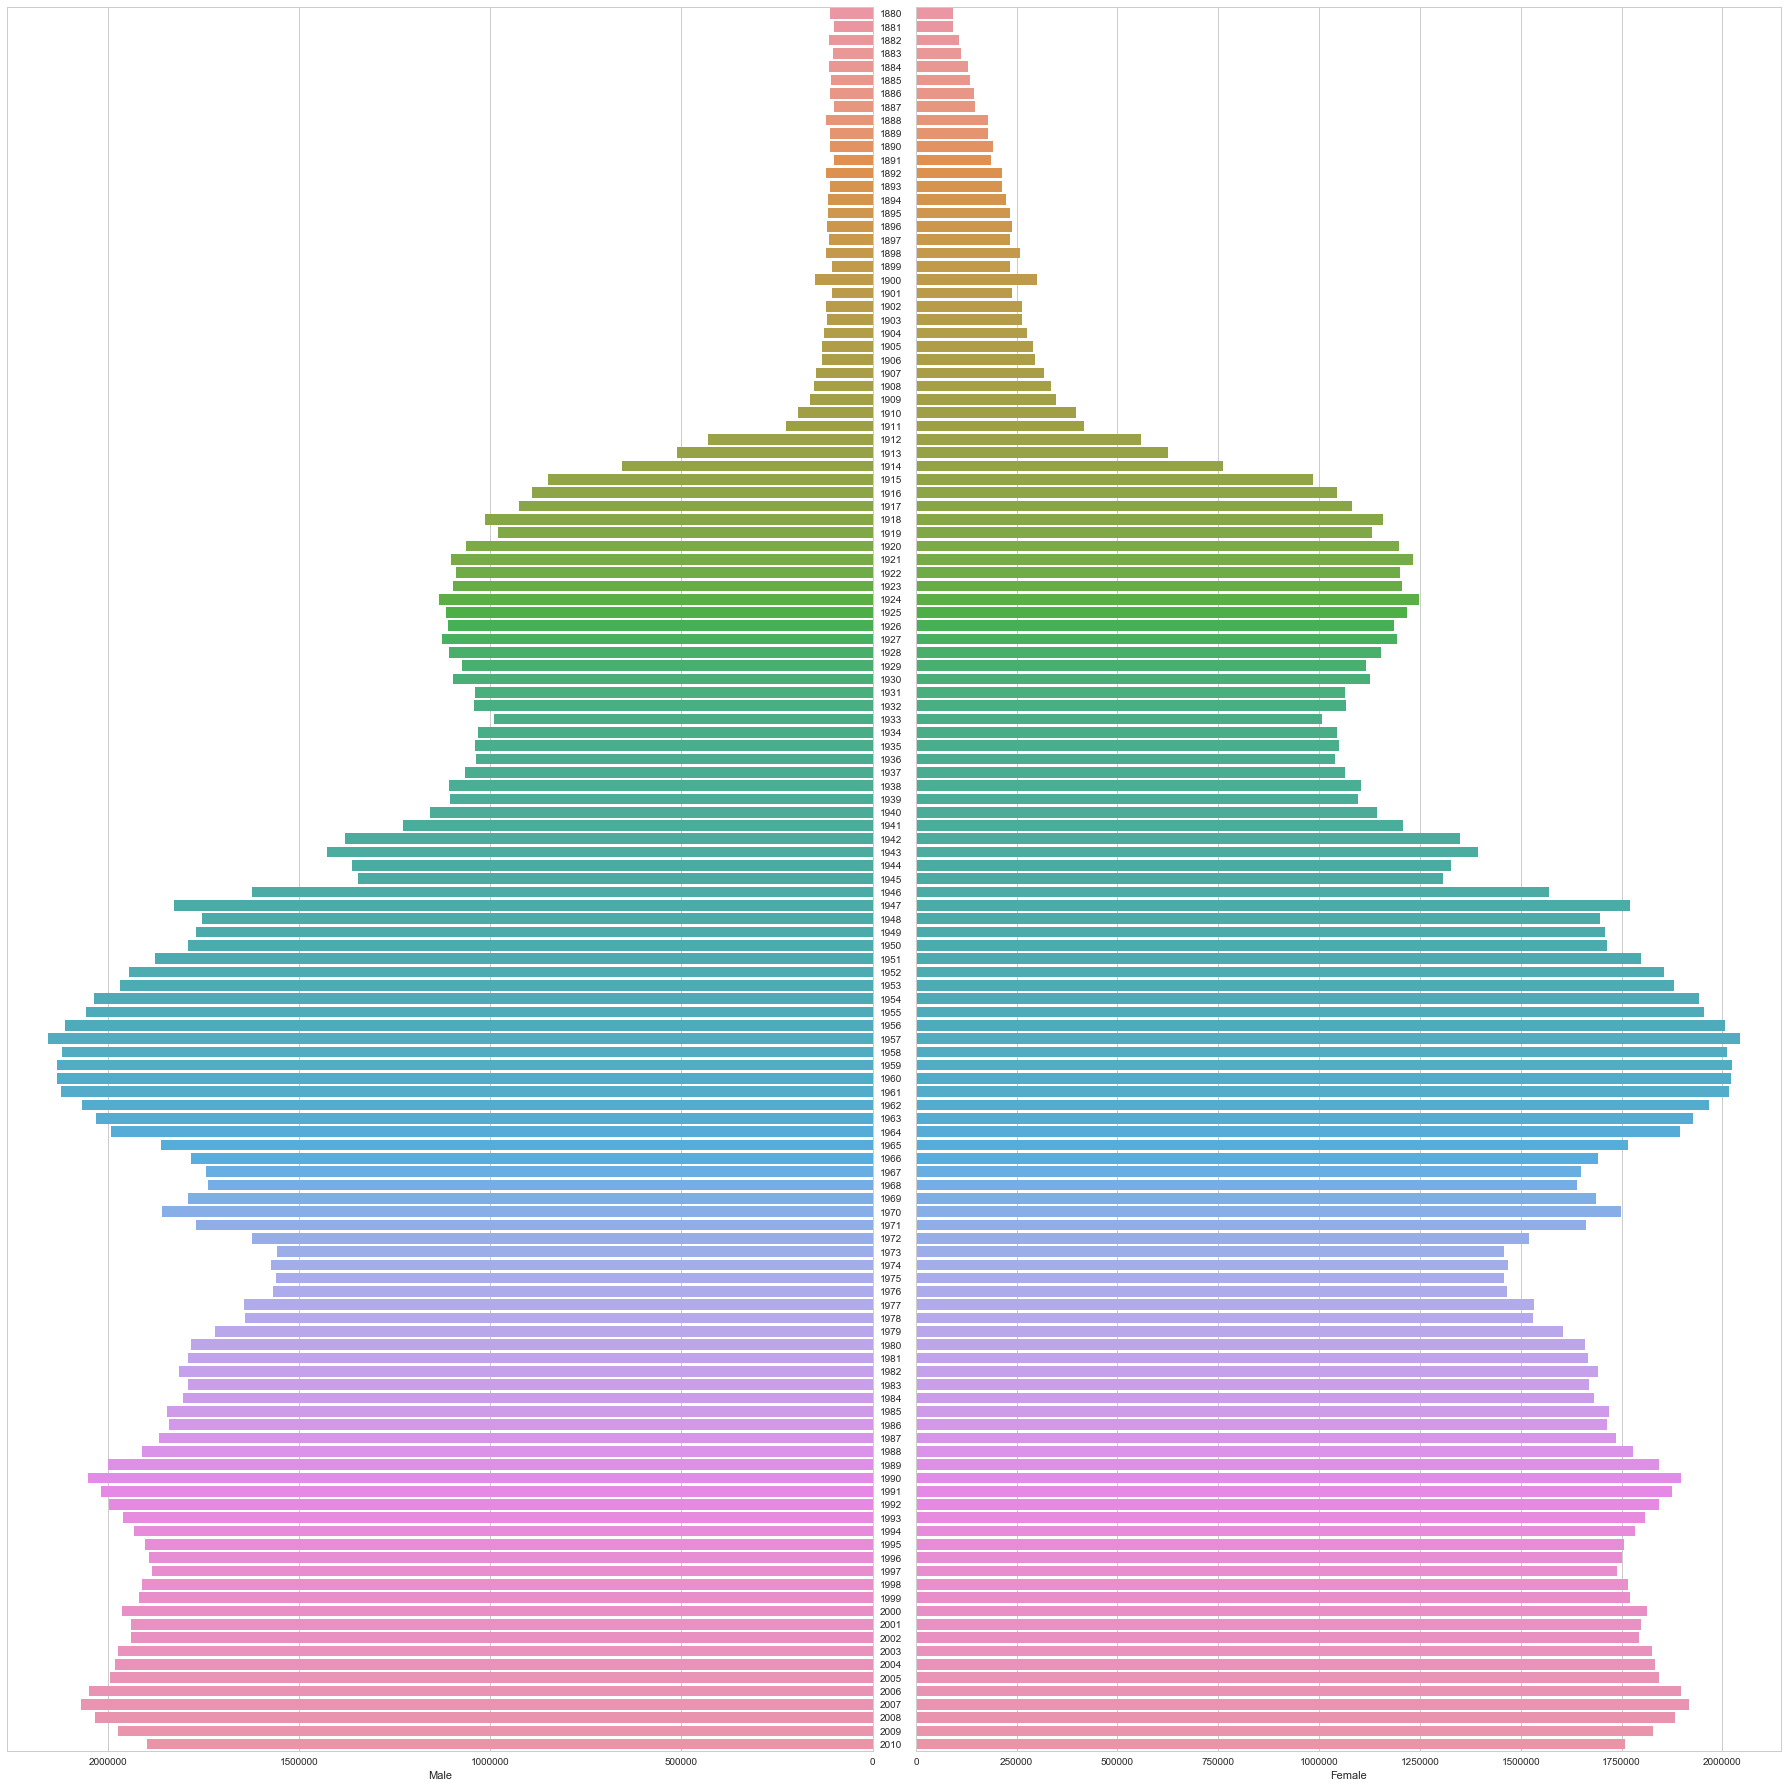

In [3]:
#общая динамика рождаемости полов
born_by_year = all_years_table.groupby(['sex', 'year']).sum().reset_index()
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,25), sharey=True)
sns.set_color_codes("pastel")
sns.barplot(x="number", y="year", data=born_by_year[born_by_year['sex']=="M"], orient='h', ax=ax1)
sns.set_color_codes("muted")
sns.barplot(x="number", y="year", data=born_by_year[born_by_year['sex']=="F"], orient='h', ax=ax2)
ax1.set(xlabel='Male', ylabel='')
ax2.set(xlabel='Female', ylabel='')
ax1.invert_xaxis()
ax1.yaxis.tick_right()
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)

In [4]:
#Most popular name in each of 10 periods
bins = [1880, 1893, 1906, 1919, 1932, 1945, 1958, 1971, 1984, 1997, 2010]
all_years_table["periods"] = pd.cut(all_years_table["year"], bins, labels=["1880-1893", "1893-1906", "1906-1919", "1919-1932", "1932-1945", "1945-1958", "1958-1971", "1971-1984", "1984-1997", "1997-2010"])
periods_groups = all_years_table.groupby(["sex", "periods", "name"]).agg({"number":"sum"})
mask = periods_groups.groupby(level=[0,1]).agg('idxmax')
periods_popular_names = periods_groups.loc[mask["number"]].reset_index()
periods_popular_female_names = periods_popular_names[periods_popular_names["sex"]=="F"]["name"].unique().tolist()
periods_popular_male_names = periods_popular_names[periods_popular_names["sex"]=="M"]["name"].unique().tolist()
print periods_popular_female_names
print periods_popular_male_names

['Mary', 'Linda', 'Lisa', 'Jennifer', 'Jessica', 'Emily']
['John', 'Robert', 'James', 'Michael', 'Jacob']


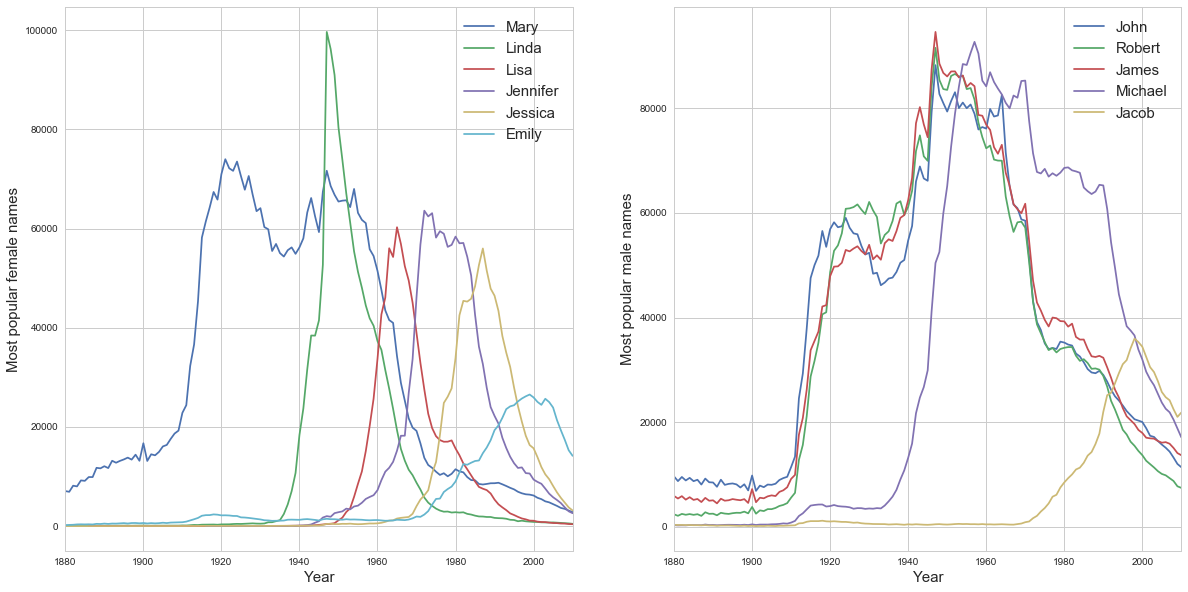

In [5]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
for female_names in periods_popular_female_names:
    all_years_table[(all_years_table["name"] == female_names) & (all_years_table["sex"]=="F")].groupby("year").sum().plot(ax=ax[0], label=female_names)
ax[0].legend(periods_popular_female_names, loc="best", fontsize=15)
ax[0].set_xlabel("Year", fontsize=15)
ax[0].set_ylabel("Most popular female names", fontsize=15)
for male_names in periods_popular_male_names:
    all_years_table[(all_years_table["name"] == male_names) & (all_years_table["sex"]=="M")].groupby("year").sum().plot(ax=ax[1])
ax[1].legend(periods_popular_male_names, loc="best", fontsize=15)
ax[1].set_xlabel("Year", fontsize=15)
ax[1].set_ylabel("Most popular male names", fontsize=15);

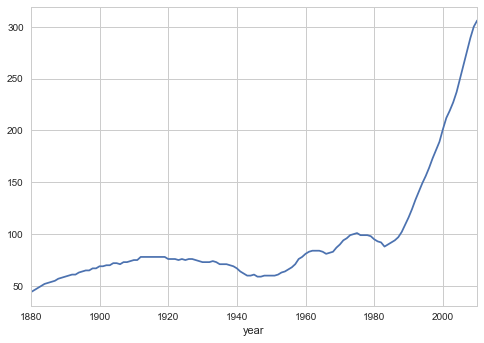

In [6]:
#Number of names covered 50% of population
test_table = all_years_table.groupby(["year", "name"]).sum()
years_grouped = test_table["number"].groupby(level=0, group_keys=False)
test_table_sorted = pd.DataFrame(years_grouped.apply(lambda x: x.sort_values(ascending=False)))
test_table_sorted["pop coverage"] = test_table_sorted.groupby(level=0, as_index=False).apply(lambda x: x.cumsum()/x.sum())
test_table_sorted_50 = test_table_sorted[test_table_sorted["pop coverage"]<=0.5]
test_table_sorted_50.groupby(level=0)["pop coverage"].count().plot();

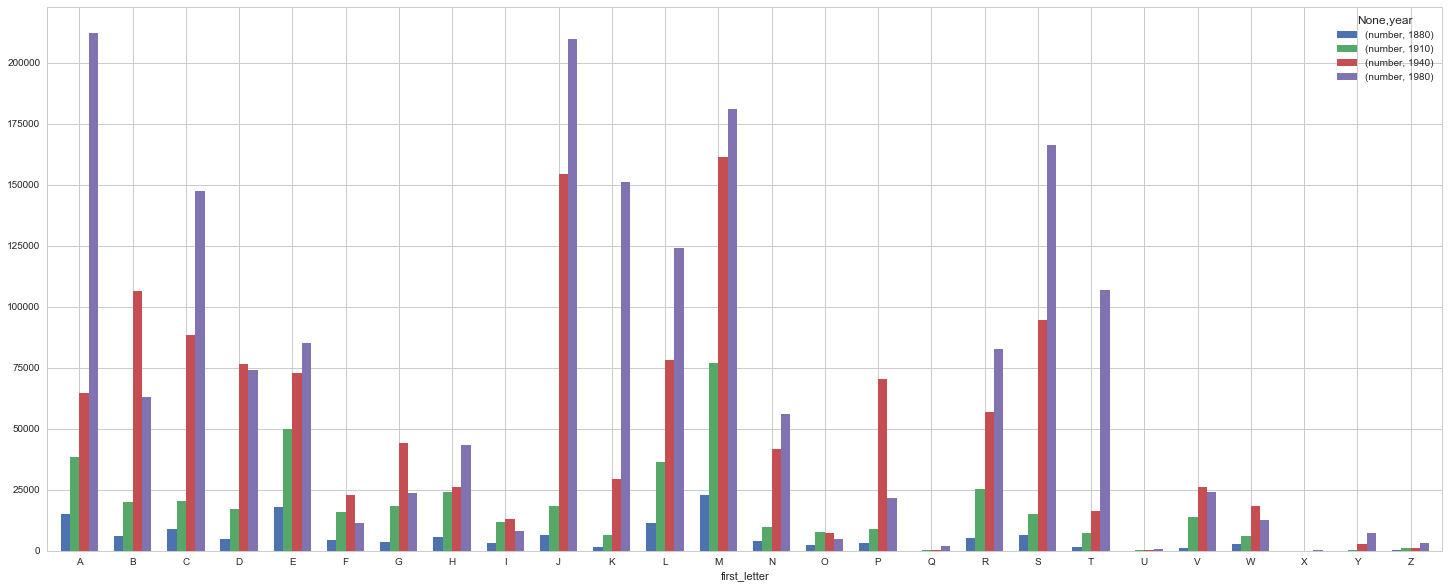

In [7]:
#First letter distribution
years_list = [1880, 1910, 1940, 1980]
uniq_names_table = all_years_table[all_years_table["year"].isin(years_list)].drop_duplicates(["year", "name"])
uniq_names_table["first_letter"] = uniq_names_table["name"].apply(lambda x: x[0].upper())
uniq_names_table["last_letter"] = uniq_names_table["name"].apply(lambda x: x[-1].upper())
first_letter_table = uniq_names_table.pivot_table(index="first_letter", columns='year', aggfunc=sum)
first_letter_table.plot(figsize=(25,10), kind='bar', rot=0, width=0.7);

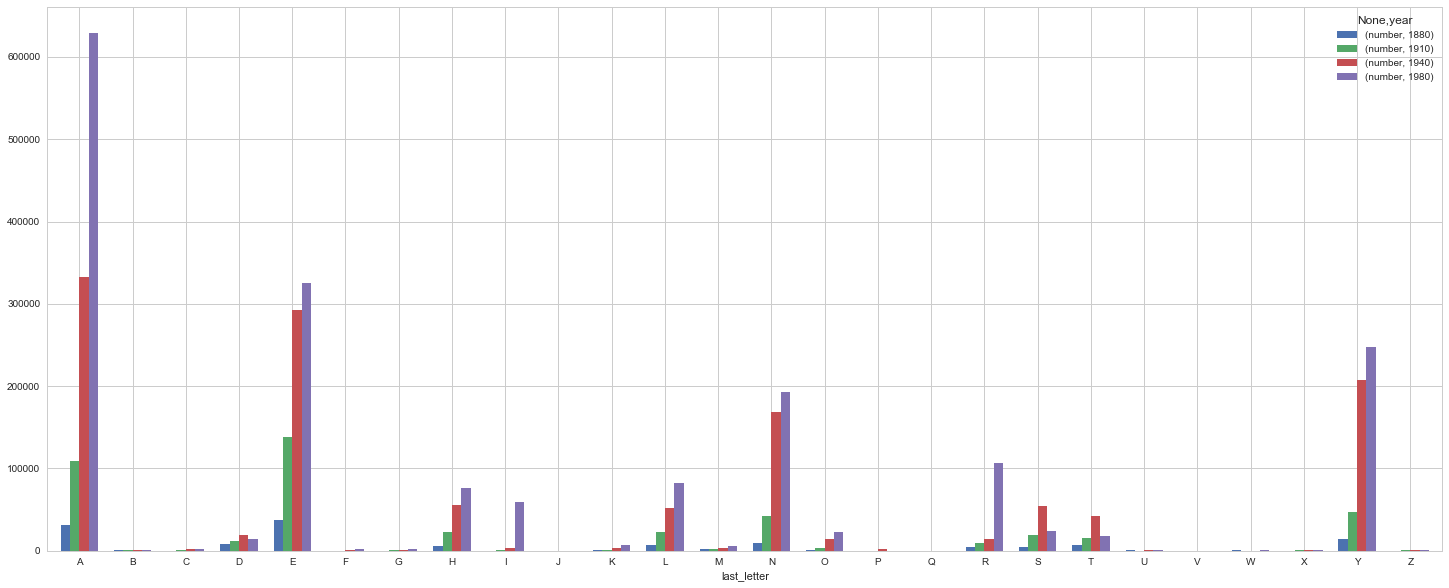

In [8]:
#Last letter distribution
last_letter_table = uniq_names_table.pivot_table(index="last_letter", columns='year', aggfunc=sum)
last_letter_table.plot(figsize=(25,10), kind='bar', rot=0, width=0.7);

Theodore
Charlie
Elvis
Pamela
Margaret


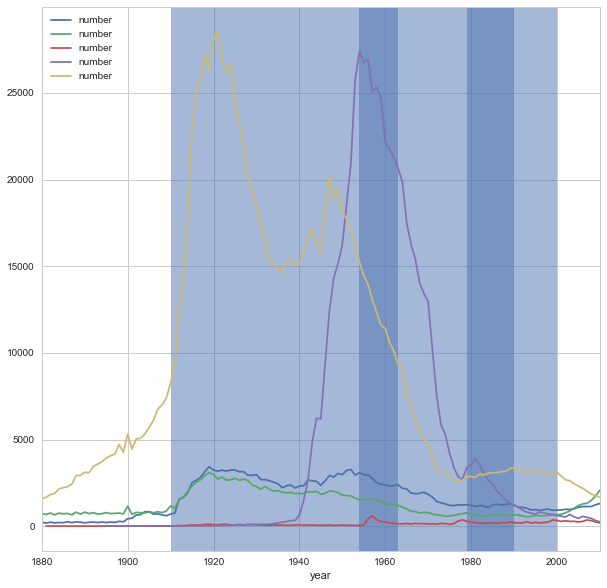

In [9]:
fig, ax = plt.subplots( figsize = (10,10))
famous_people_dict = {"Theodore":(1910,1953), "Elvis":(1953,1963), "Charlie":(1970, 2000), "Pamela": (1954,1970), "Margaret":(1979,1990)}
for i, names in enumerate(famous_people_dict.keys()):
    print names
    all_years_table[all_years_table["name"]==names].groupby("year").sum().plot(ax=ax)
    ax.axvspan(famous_people_dict[names][0], famous_people_dict[names][1], alpha=0.5)
